In [3]:
#load libaries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt


import scipy.stats as stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
import Utils as ut

In [5]:
#read data
X_train = pd.read_csv('../../data/X_train.csv', index_col = 0)
y_train = pd.read_csv('../../data/y_train.csv', index_col = 0)
X_test = pd.read_csv('../../data/X_test.csv', index_col = 0)
y_test = pd.read_csv('../../data/y_test.csv', index_col = 0)
housing_df = pd.read_csv('../../data/final_data.csv', index_col = 0)

In [6]:
#removing outliers
housing_df = housing_df[(np.abs(stats.zscore(housing_df['price'])) < 3)]
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,yr_built,yr_renovated,sqft_living15,sqft_lot15,coordinates,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,grade_category
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7,1180,...,1955,0.0,1340,5650,"[47.5112, -122.257]",3.000000,4.788136,0.880597,393.333333,medium
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7,2170,...,1951,1991.0,1690,7639,"[47.721, -122.319]",1.333333,2.817899,1.520710,856.666667,medium
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6,770,...,1933,0.0,2720,8062,"[47.7379, -122.233]",2.000000,12.987013,0.283088,385.000000,low
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7,1050,...,1965,0.0,1360,5000,"[47.5208, -122.393]",1.333333,2.551020,1.441176,490.000000,medium
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8,1680,...,1987,0.0,1800,7503,"[47.6168, -122.045]",1.500000,4.809524,0.933333,560.000000,medium


In [7]:
#get the shape of the train and test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16197, 20), (5400, 20), (16197, 1), (5400, 1))

In [8]:
#check if the X_train equals y_train
X_train.index == y_train.index

array([ True,  True,  True, ...,  True,  True,  True])

In [9]:
#check if the X_test equals y_test
X_test.index == y_test.index

array([ True,  True,  True, ...,  True,  True,  True])

In [10]:
print("X_train:")
display(X_train.describe())
print("X_test:")
display(X_test.describe())

X_train:


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms
count,1.619700e+04,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,4.596556e+09,3.372229,2.116426,2083.693030,1.507189e+04,1.494752,7.658702,1790.467926,287.657159,1971.019942,67.419522,1987.809286,12784.065074,1.750182,7.326601,1.053928,619.321692
std,2.888074e+09,0.905951,0.768049,918.209756,4.077585e+04,0.540474,1.169277,827.598600,440.726697,29.325399,360.641442,685.189105,26833.379871,0.653123,19.599984,0.319392,216.114350
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.400000,0.214876,0.248344,200.000000
25%,2.122049e+09,3.000000,1.750000,1430.000000,5.058000e+03,1.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000,1.333333,2.447619,0.883495,470.000000
50%,3.905082e+09,3.000000,2.250000,1912.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,1.600000,4.037186,1.000000,577.500000
75%,7.338403e+09,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,2360.000000,10086.000000,2.000000,6.405229,1.161383,725.000000
max,9.900000e+09,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,8.000000,1270.276154,6.000000,3000.000000


X_test:


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms
count,5.400000e+03,5400.000000,5400.000000,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,4.532239e+09,3.376111,2.114028,2070.210185,1.518194e+04,1.492130,7.655556,1782.984630,279.895926,1970.938889,72.773519,1983.054074,12680.953148,1.757062,7.746582,1.050794,614.627266
std,2.842176e+09,0.984894,0.771851,917.805949,4.327026e+04,0.537347,1.184994,828.294279,437.077406,29.526848,374.044172,685.405621,28558.979278,0.694639,30.014194,0.323071,215.233484
min,1.000102e+06,1.000000,0.750000,410.000000,6.090000e+02,1.000000,4.000000,410.000000,0.000000,1900.000000,0.000000,670.000000,659.000000,0.444444,0.246559,0.187279,49.090909
25%,2.130627e+09,3.000000,1.750000,1420.000000,5.001000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1480.000000,5100.000000,1.333333,2.479164,0.874564,470.000000
50%,3.880401e+09,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,7.000000,1550.000000,0.000000,1975.000000,0.000000,1830.000000,7619.500000,1.600000,4.045049,1.000000,572.500000
75%,7.229926e+09,4.000000,2.500000,2520.000000,1.058800e+04,2.000000,8.000000,2200.000000,530.000000,1997.000000,0.000000,2370.000000,10080.000000,2.000000,6.306019,1.159822,715.000000
max,9.842300e+09,33.000000,7.750000,10040.000000,1.164794e+06,3.000000,13.000000,8860.000000,3260.000000,2015.000000,2015.000000,5790.000000,858132.000000,18.857143,1640.554930,5.101562,3420.000000


In [11]:
print("y_train:")
display(y_train.describe())
print("y_test:")
display(y_test.describe())

y_train:


,price
count,1.619700e+04
mean,5.412845e+05
std,3.663447e+05
min,7.800000e+04
25%,3.235000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


y_test:


,price
count,5.400000e+03
mean,5.373335e+05
std,3.704391e+05
min,8.300000e+04
25%,3.200000e+05
50%,4.500000e+05
75%,6.400000e+05
max,7.060000e+06


In [13]:
#creating a traindf and test df
train_df = pd.concat([X_train,y_train], axis =1)
test_df = pd.concat([X_test,y_test], axis = 1)

In [14]:
print("train_df:")
display(train_df)
print("test_df:")
display(test_df)

train_df:


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,yr_renovated,sqft_living15,sqft_lot15,coordinates,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,grade_category,price
6405,3905080280,3,2.50,1880,4499,2.0,Average,8,1880,0.0,...,0.0,2130,5114,"[47.5664, -121.999]",1.200000,2.393085,0.882629,626.666667,medium,529000.0
937,5466420030,3,2.50,2020,6564,1.0,Average,7,1310,710.0,...,0.0,1710,5151,"[47.3545, -122.158]",1.200000,3.249505,1.181287,673.333333,medium,253000.0
19076,2623069010,5,4.00,4720,493534,2.0,Very Good,9,3960,760.0,...,0.0,2160,219542,"[47.4536, -122.009]",1.250000,104.562288,2.185185,944.000000,medium,745000.0
15201,4443800545,2,2.00,1430,3880,1.0,Good,7,1430,0.0,...,0.0,1430,3880,"[47.6844, -122.392]",1.000000,2.713287,1.000000,715.000000,medium,545000.0
13083,9485930120,3,2.25,2270,32112,1.0,Good,8,1740,530.0,...,0.0,2310,41606,"[47.3451, -122.094]",1.333333,14.146256,0.982684,756.666667,medium,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,3,2.50,2230,5800,2.0,Average,7,2230,0.0,...,0.0,2230,6088,"[47.5308, -121.847]",1.200000,2.600897,1.000000,743.333333,medium,440000.0
21575,4140940150,4,2.75,2770,3852,2.0,Average,8,2770,0.0,...,0.0,1810,5641,"[47.5001, -122.232]",1.454545,1.390614,1.530387,692.500000,medium,572000.0
5390,8658300480,4,1.50,1530,9000,1.0,Good,6,1530,0.0,...,0.0,1520,8500,"[47.6492, -121.908]",2.666667,5.882353,1.006579,382.500000,low,299800.0
860,1723049033,1,0.75,380,15000,1.0,Average,5,380,0.0,...,0.0,1170,15000,"[47.481, -122.323]",1.333333,39.473684,0.324786,380.000000,low,245000.0


test_df:


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,yr_renovated,sqft_living15,sqft_lot15,coordinates,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,grade_category,price
3686,6303401050,3,0.75,850,8573,1.0,Average,6,600,250.0,...,0.0,850,8382,"[47.503, -122.356]",4.000000,10.085882,1.000000,283.333333,low,132500.0
10247,1995200200,3,1.00,1510,6083,1.0,Good,6,860,650.0,...,0.0,1510,5712,"[47.6966, -122.324]",3.000000,4.028477,1.000000,503.333333,low,415000.0
4037,1423089118,4,2.25,1790,42000,1.0,Average,7,1170,620.0,...,0.0,2060,50094,"[47.4819, -121.744]",1.777778,23.463687,0.868932,447.500000,medium,494000.0
3437,9349900110,2,1.50,1140,2500,1.0,Average,7,630,510.0,...,0.0,1500,5000,"[47.5707, -122.359]",1.333333,2.192982,0.760000,570.000000,medium,355000.0
19291,455000395,3,1.00,1500,3920,1.0,Average,7,1000,500.0,...,0.0,1640,4017,"[47.6718, -122.359]",3.000000,2.613333,0.914634,500.000000,medium,606000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,6381500265,5,1.00,1170,6757,1.0,Good,6,800,370.0,...,0.0,1590,6794,"[47.7332, -122.304]",5.000000,5.775214,0.735849,234.000000,low,397000.0
15003,1250202115,3,1.75,1670,5100,1.0,Very Good,7,990,680.0,...,0.0,2140,4452,"[47.5898, -122.291]",1.714286,3.053892,0.780374,556.666667,medium,615000.0
13478,1336800065,4,2.25,3260,4640,2.0,Very Good,9,2360,900.0,...,0.0,3240,5800,"[47.6272, -122.312]",1.777778,1.423313,1.006173,815.000000,medium,1330000.0
18399,5469650040,4,5.00,5820,13906,2.0,Average,11,3750,2070.0,...,0.0,2980,13000,"[47.3814, -122.164]",0.800000,2.389347,1.953020,1455.000000,high,784500.0


In [15]:
train_df.columns


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'coordinates',
       'bedrooms_bathrooms', 'sqft_lot_sqft_living',
       'sqft_living_sqft_living15', 'sqft_living_bedrooms', 'grade_category',
       'price'],
      dtype='object')

In [16]:
#drop id column
train_df = train_df.drop(['id'], axis = 1)
test_df =  test_df.drop(['id'], axis = 1)

In [17]:
train_df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'coordinates',
       'bedrooms_bathrooms', 'sqft_lot_sqft_living',
       'sqft_living_sqft_living15', 'sqft_living_bedrooms', 'grade_category',
       'price'],
      dtype='object')

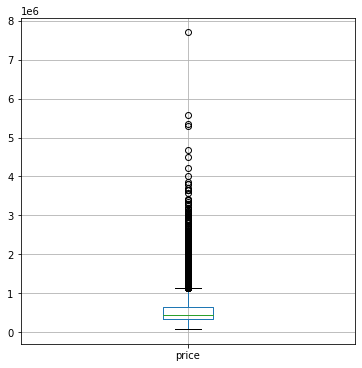

In [18]:
#plot boxplot to view price outlier
plt.figure(figsize = (6,6))
train_df.boxplot(column = 'price')
plt.show()

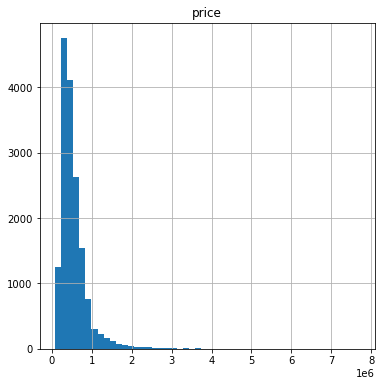

In [19]:
train_df.hist(column='price', bins = 50, figsize=(6,6))
plt.show()

The price distribution is positively skewed data, we can also see alot of outliers as expected. meaning that there is a wide price range.

In [20]:
#check the target mean for the price
train_target_mean = y_train.mean()
train_target_mean

price    541284.461567
dtype: float64

In [21]:
#Import sklearn metric library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Calculating the predictions for the Train and Test df using the mean multiply by the length

baseline_train_preds = [train_target_mean] * len(y_train)
baseline_test_preds = [train_target_mean] * len(y_test)


print("Rsquared:")

print(f"Train R2: {r2_score(y_train,baseline_train_preds):.4f}")
print(f"Validation R2: {r2_score(y_test,baseline_test_preds):.4f}")


print("-----")

print("Root Mean squared Error:")

print(f"Train RMSE: ${mean_squared_error(y_train,baseline_train_preds,squared = False):,.2f}")
print(f"Validation RMSE: ${mean_squared_error(y_test,baseline_test_preds, squared = False):,.2f}")



print("-----")

print(" Mean absolute Error:")

print(f"Train MAE: ${mean_absolute_error(y_train,baseline_train_preds):,.2f}")
print(f"Validation MAE: ${mean_absolute_error(y_test,baseline_test_preds):,.2f}")



Rsquared:
Train R2: 0.0000
Validation R2: -0.0001
-----
Root Mean squared Error:
Train RMSE: $366,333.44
Validation RMSE: $370,425.86
-----
 Mean absolute Error:
Train MAE: $234,722.63
Validation MAE: $233,000.84


Result Summary:
- The R2 of the baseline is relatively low. It means that we still need to engineer all the feature to get a better result for our model.

<AxesSubplot:>

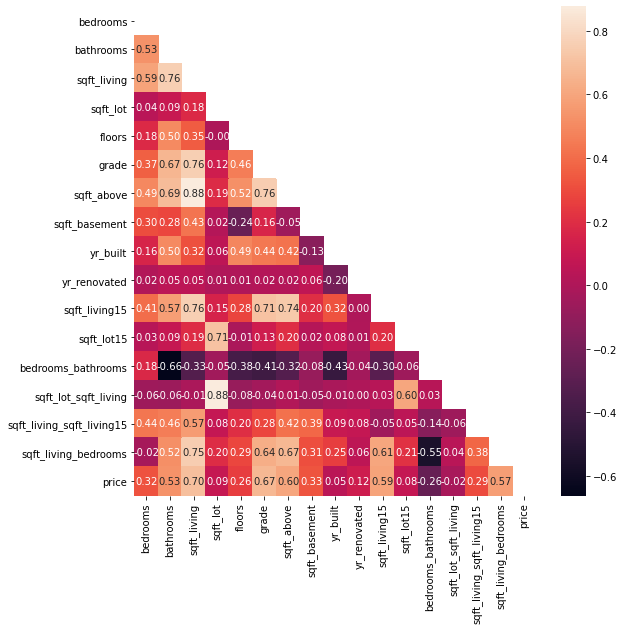

In [22]:
plt.figure(figsize = (9,9))
sns.heatmap(train_df.corr(),mask =np.triu(np.ones_like(train_df.corr(),
                                                       dtype = bool)), annot = True, fmt='.2f')

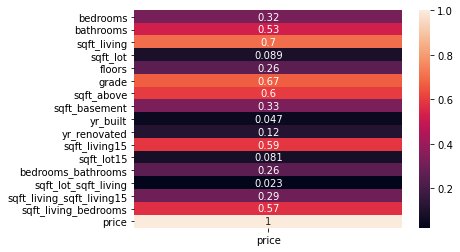

In [24]:
#Using the heatmap to view the feature that correlate with the target.
sns.heatmap(abs(train_df.corr())[['price']], annot = True);

In [25]:
corr_cols = ['sqft_living','grade', 'sqft_living_bedrooms', 'bathrooms', 'sqft_living15','sqft_above']
corr_cols

['sqft_living',
 'grade',
 'sqft_living_bedrooms',
 'bathrooms',
 'sqft_living15',
 'sqft_above']

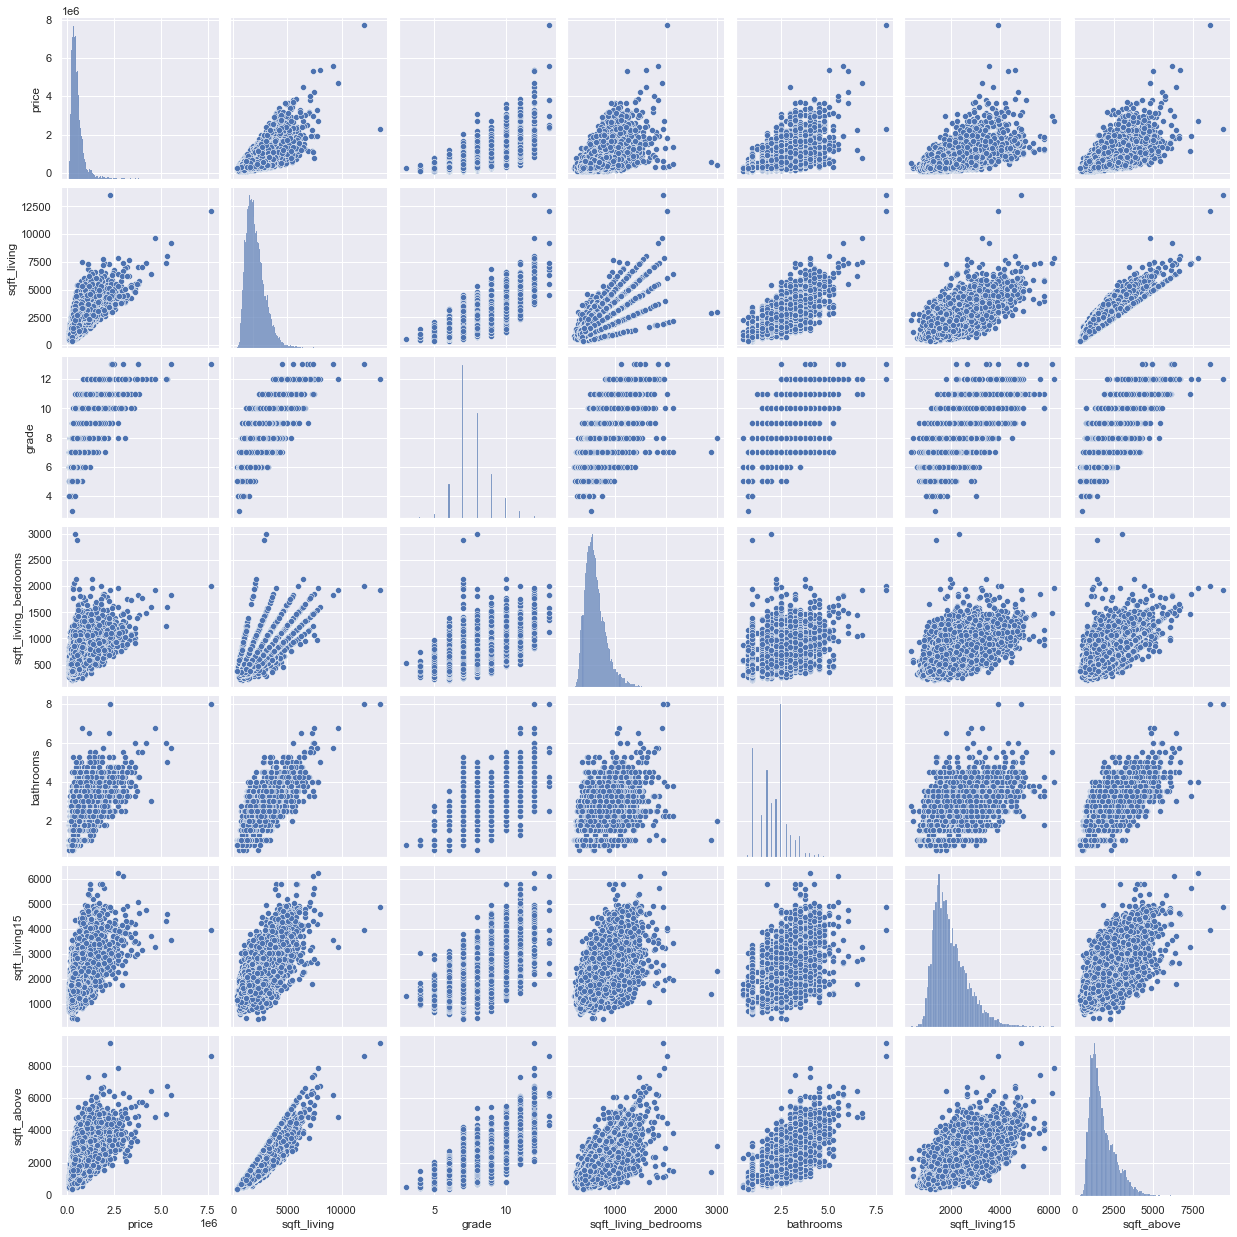

In [26]:
sns.set()
Cols =['price','sqft_living','grade', 'sqft_living_bedrooms', 'bathrooms', 'sqft_living15','sqft_above'] 
sns.pairplot(train_df[Cols], size = 2.5)

The pairplots confirms the findings of the heatmap. There is significant correlation between the Price,  sqft_living, grade, sqft_living_bedrooms, bathrooms, sqft_living15, and sqft_above. which gives us the opportunity to combine features so we can determine a better r2 for our model.

# First Model

In [27]:
#get the formula
formula = 'price ~ sqft_living'
#using stats model ols
sim_model_train = ols(formula = formula, data = train_df).fit()
sim_model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:55:39   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
sim_model_train_preds = sim_model_train.predict(train_df['sqft_living'])
sim_model_test_preds = sim_model_train.predict(test_df['sqft_living'])


In [29]:
ut.evaluate(y_train, sim_model_train_preds, y_test, sim_model_test_preds)

Rsquared:
Train R2: 0.4906
Validation R2: 0.4989
-----
Root Mean squared Error:
Train RMSE: $261,471.87
Validation RMSE: $262,216.52
-----
 Mean absolute Error:
Train MAE: $174,170.69
Validation MAE: $171,964.83


In [30]:
#create instance of influence
influence = sim_model_train.get_influence()
#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal
print(standardized_residuals)

[ 0.17070547 -1.03444252 -2.03884041 ... -0.33180431  0.68769547
 -0.70322437]


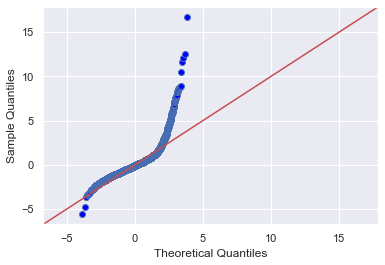

In [31]:
# Checking the normality assumptions by creating a QQplot 
residuals = sim_model_train.resid
fig = sm.qqplot(residuals,dist =stats.norm, line = '45', fit = True)
fig.show()

None of the observation appears to be outliers, since the stanadardized residuals exceed an absolute value of 3

# Second Model

In [32]:
#building a model using the most correlated features

target = 'price'
x_cols = list(corr_cols)
data = train_df
x_col_join = '+' .join(x_cols)
formula = target + '~' + x_col_join
multi_model = ols(formula, data).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     3275.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:56:15   Log-Likelihood:            -2.2405e+05
No. Observations:               16197   AIC:                         4.481e+05
Df Residuals:                   16190   BIC:                         4.482e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.844e+05   1.57e+04    -43.702      0.000   -7.15e+05   -6.54e+05
sqft_living            228.3738      5.740     39.784      0.000     217.122     239.626
grade                 1.128e+05   2874.136     39.240      0.000    1.07e+05    1.18e+05
sqft_living_bedrooms    83.4803     13.895      6.008      0.000      56.245     110.715
bathrooms            -2.891e+04   4021.821     -7.189      0.000   -3.68e+04    -2.1e+04
sqft_living15           28.0047      4.659      6.012      0.000      18.874      37.136
sqft_above             -89.4515      5.116    -17.485      0.000     -99.480     -79.424
==============================================================================
Omnibus:                    11985.829   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           556192.100
Skew:                           3.084   Prob(JB):                         0.00
Kurtosis:                      31.037   Cond. No.                     3.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
multi_model_train_preds = multi_model.predict(train_df[corr_cols])
multi_model_test_preds = multi_model.predict(test_df[corr_cols])

In [34]:
ut.evaluate(y_train,multi_model_train_preds, y_test,multi_model_test_preds)

Rsquared:
Train R2: 0.5483
Validation R2: 0.5376
-----
Root Mean squared Error:
Train RMSE: $246,219.20
Validation RMSE: $251,871.09
-----
 Mean absolute Error:
Train MAE: $161,404.46
Validation MAE: $159,731.76


In [35]:
#create instance of influence
influence = multi_model.get_influence()
#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal
print(standardized_residuals)

[ 0.0416074  -0.92618961 -1.3530855  ...  0.25903664  1.09598583
 -0.48658977]


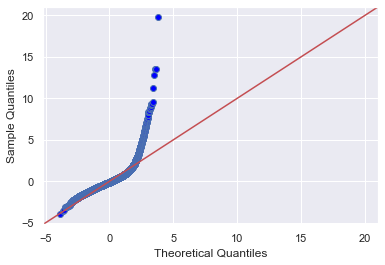

In [36]:
# Checking the normality assumptions by creating a QQplot 
residuals = multi_model.resid
fig = sm.qqplot(residuals,dist =stats.norm, line = '45', fit = True)
fig.show()

# Third Model

In [37]:

target = 'price'
s_cols = ['sqft_living','sqft_living_bedrooms','sqft_living15']
data = train_df
s_col_join = '+' .join(s_cols)
formula = target + '~' + s_col_join
third_multi_model = ols(formula, data).fit()
third_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5461.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:56:49   Log-Likelihood:            -2.2483e+05
No. Observations:               16197   AIC:                         4.497e+05
Df Residuals:                   16193   BIC:                         4.497e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.393e+05   7043.182    -19.772      0.000   -1.53e+05   -1.25e+05
sqft_living            210.2657      4.113     51.123      0.000     202.204     218.328
sqft_living_bedrooms   166.0139     14.277     11.628      0.000     138.029     193.999
sqft_living15           70.2268      4.572     15.359      0.000      61.265      79.189
==============================================================================
Omnibus:                    11069.031   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381680.333
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      26.100   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
third_multi_model_train_preds = third_multi_model.predict(train_df[s_cols])
third_multi_model_test_preds = third_multi_model.predict(test_df[s_cols])

In [39]:
ut.evaluate(y_train, third_multi_model_train_preds, y_test, third_multi_model_test_preds)

Rsquared:
Train R2: 0.5029
Validation R2: 0.5085
-----
Root Mean squared Error:
Train RMSE: $258,278.90
Validation RMSE: $259,675.37
-----
 Mean absolute Error:
Train MAE: $171,853.36
Validation MAE: $169,225.75


In [40]:
influence = third_multi_model.get_influence()
#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal
print(standardized_residuals)

[ 0.07487531 -1.0234249  -1.61372589 ... -0.20478134  0.61604032
 -0.80299805]


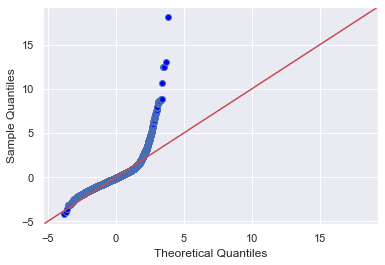

In [41]:
# Checking the normality assumptions by creating a QQplot 
residuals = third_multi_model.resid
fig = sm.qqplot(residuals,dist =stats.norm, line = '45', fit = True)
fig.show()

# Fourth Model

In [42]:
#get the formula
formula = 'price ~ grade'
#using stats model ols
fourth_model_train = ols(formula = formula, data = train_df).fit()
fourth_model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 1.331e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:59:18   Log-Likelihood:            -2.2563e+05
No. Observations:               16197   AIC:                         4.513e+05
Df Residuals:                   16195   BIC:                         4.513e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.07e+06   1.41e+04    -75.758      0.000    -1.1e+06   -1.04e+06
grade       2.105e+05   1823.878    115.386      0.000    2.07e+05    2.14e+05
==============================================================================
Omnibus:                    13684.378   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954732.403
Skew:                           3.659   Prob(JB):                         0.00
Kurtosis:                      39.894   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
fourth_model_train_preds = fourth_model_train.predict(train_df['grade'])
fourth_model_test_preds = fourth_model_train.predict(test_df['grade'])


In [44]:
ut.evaluate(y_train, fourth_model_train_preds, y_test, fourth_model_test_preds)

Rsquared:
Train R2: 0.4512
Validation R2: 0.4313
-----
Root Mean squared Error:
Train RMSE: $271,387.80
Validation RMSE: $279,334.81
-----
 Mean absolute Error:
Train MAE: $175,833.26
Validation MAE: $175,178.93


In [45]:
influence = fourth_model_train.get_influence()
#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal
print(standardized_residuals)

[-0.30991894 -0.55145219 -0.28948024 ...  0.39645431  0.97010052
 -0.25096438]


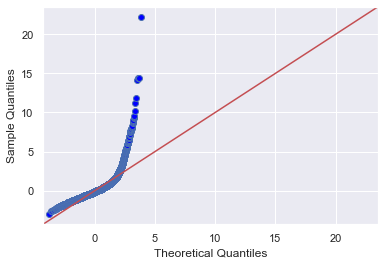

In [47]:
#residuals = fourth_model_train.resid
fig = sm.qqplot(standardized_residuals,dist =stats.norm, line = '45', fit = True)
fig.show()